## ABOUT DATASET

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.


## IMPORTING LIBRARIES

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import numpy as np
from sorted_months_weekdays import Month_Sorted_Month

## READING DATASET

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## CLEANING DATA

In [8]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [9]:
nan_replacements = {"children": 0.0,"country": "Unknown", "agent": 0, "company": 0}
df = df.fillna(nan_replacements)

In [10]:
df.isnull().sum().sort_values(ascending=False)[:10]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
company                        0
agent                          0
dtype: int64

## DATA EXPLORARAY ANALYSIS 

In [41]:
def show_values_on_bars(axs, h_v="v", space=0.4, fontsize=12):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + float(space)
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=fontsize)
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left", fontsize=fontsize)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [42]:
Month_Sorted_Month(df['arrival_date_month'])

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

### 1. The total number of bookings from this dataset

<AxesSubplot:ylabel='hotel'>

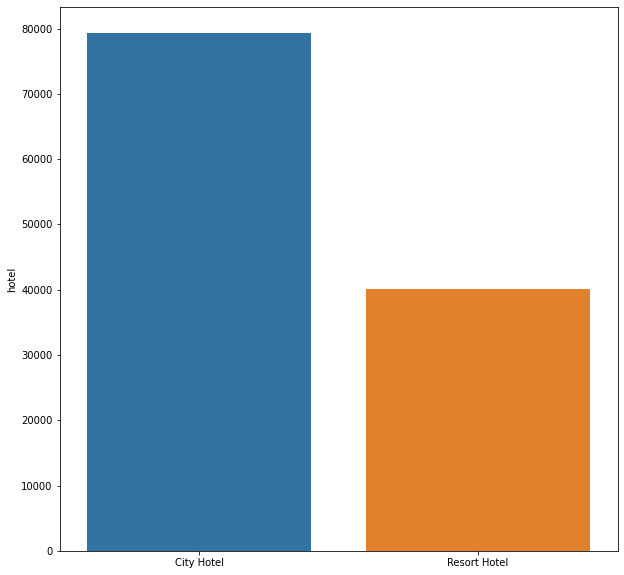

In [183]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['hotel'].value_counts().index, 
            y=df['hotel'].value_counts(),
            orient='v')

The bar chart above compares the number of bookings at City Hotel and that of Resort Hotel. The City Hotel has a tremendous number of bookings that nearly doubles that of Resort Hotel. 

### 2. The total number bookings of Resort Hotel through 2016

<ipython-input-45-81afb69caf33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_2016["arrival_date_month"] = pd.Categorical(resort_2016["arrival_date_month"], categories=ordered_months, ordered=True)


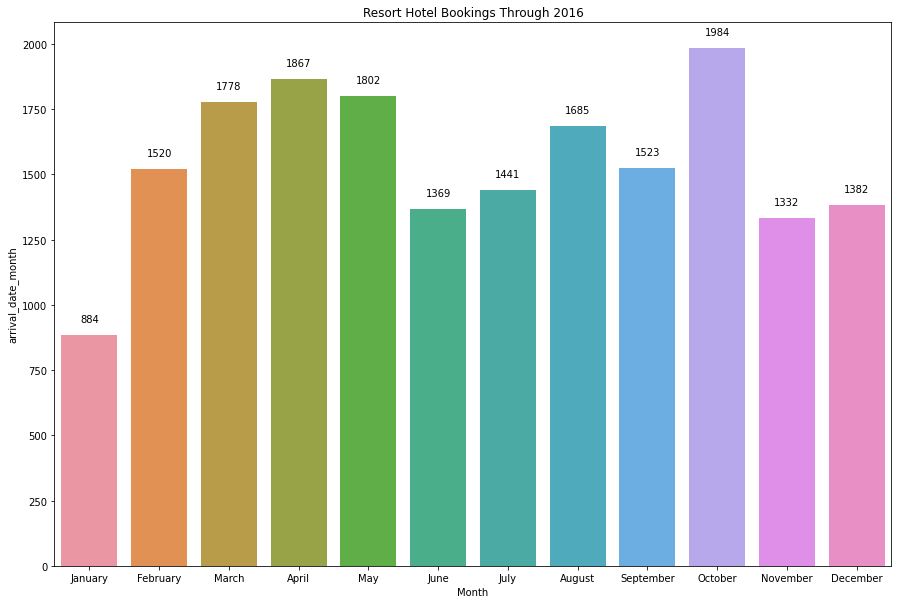

In [45]:
resort_2016 = df[
    (df['hotel'] == 'Resort Hotel') & 
    (df['arrival_date_year'] == 2016)
]
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
resort_2016["arrival_date_month"] = pd.Categorical(resort_2016["arrival_date_month"], categories=ordered_months, ordered=True)
resort_2016

plt.xlabel('Month')
plt.ylabel('Bookings')
plt.title('Resort Hotel Bookings Through 2016')
g = sns.barplot(x=resort_2016['arrival_date_month'].value_counts().index, 
                y=resort_2016['arrival_date_month'].value_counts(),
                orient='v')
plt.gcf().set_size_inches(15, 10)      
show_values_on_bars(g, "v", space=50, fontsize=10)

Resort Hotel Bookings Through 2016:

- The least number of bookings is on January 
- The most number of bookings is on October 
- 2 main seasons: March Apri May + August September October

### 3. The total number bookings of City Hotel through 2016

<ipython-input-43-7d4a855ff5e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_2016["arrival_date_month"] = pd.Categorical(city_2016["arrival_date_month"], categories=ordered_months, ordered=True)


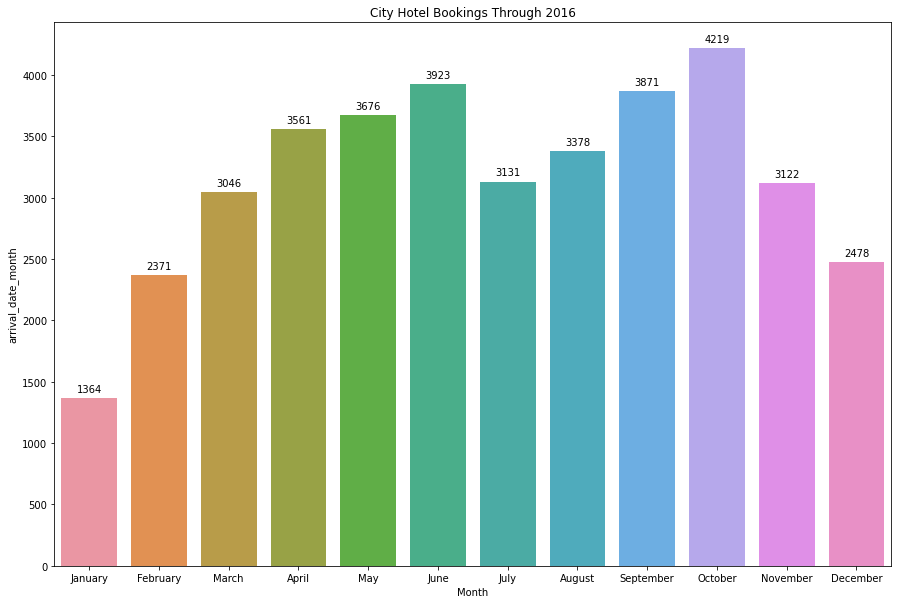

In [43]:
city_2016 = df[
    (df['hotel'] == 'City Hotel') & 
    (df['arrival_date_year'] == 2016)
]
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
city_2016["arrival_date_month"] = pd.Categorical(city_2016["arrival_date_month"], categories=ordered_months, ordered=True)
city_2016

plt.xlabel('Month')
plt.ylabel('Bookings')
plt.title('City Hotel Bookings Through 2016')
g = sns.barplot(x=city_2016['arrival_date_month'].value_counts().index, 
                y=city_2016['arrival_date_month'].value_counts(),
                orient='v')
plt.gcf().set_size_inches(15, 10)      
show_values_on_bars(g, "v", space=50, fontsize=10)


City Hotel Bookings Through 2016:

- The least number of bookings is on January
- The most number of bookings is on October
- 2 main seasons: Apri May June + September October

### 4. The total number of bookings through years

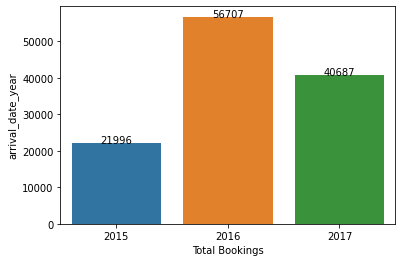

In [44]:
plt.xlabel('Total Bookings')
plt.ylabel('Year Comparison')
g = sns.barplot(x=df['arrival_date_year'].value_counts().index, 
                y=df['arrival_date_year'].value_counts(),
                orient='v')
show_values_on_bars(g, "v", space=10, fontsize=10)

The total number of bookings fluctuated across the year, from 2015 to 2016 there is a significant increase, as the number almost trippled from 20k to over 55k. After the peak in 2016, the number of bookings decreased slightly in 2017, down to nearly 40k.

### 5. The number of canceled bookings

In [18]:
pd.crosstab(df['hotel'], df['is_canceled'], normalize='index')

is_canceled,0,1
hotel,,
City Hotel,0.582730,0.417270
Resort Hotel,0.722366,0.277634


Text(0, 0.5, 'Booking Canceled')

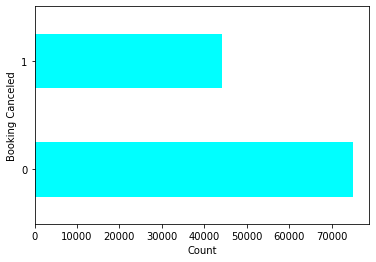

In [46]:
df['is_canceled'].value_counts().plot(kind='barh', color='cyan')
plt.xlabel('Count')
plt.ylabel('Booking Canceled')

There is a considerable difference between the cancellation rate of City Hotel and that number of Resort Hotel. 41.7 % versus 27.8%.

### 6. The number of bookings through years, a comparision between two hotel

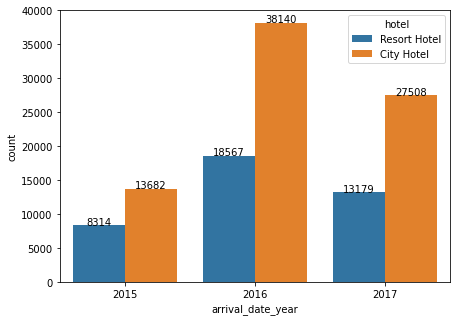

In [47]:
plt.subplots(figsize=(7,5))
a = sns.countplot(x='arrival_date_year', hue='hotel',  data=df)
show_values_on_bars(a, "v", space=50, fontsize=10)

In general, City Hotel has a number of bookings which is more significant than that of Resort Hotel through years
- In 2015, City Hotel had 13682 bookings while Resort Hotel had only 8314
- In 2016, City Hotel far more doubled Resort Hotel, 38140 versus 18567 bookings 
- In 2017, number of bookings at City Hotel doubled that of Resort Hotel  again. 

### 7. Customer Type

Text(0.5, 1.0, 'Popularity of Bookings')

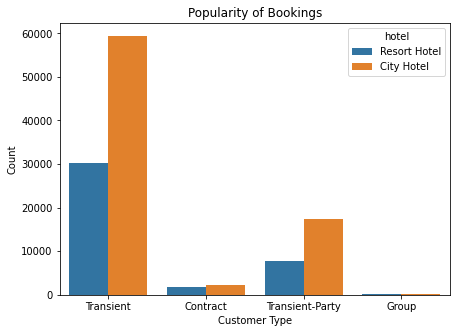

In [21]:
plt.subplots(figsize=(7,5))
sns.countplot(x='customer_type', hue='hotel',  data=df)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Popularity of Bookings')

There are four types of customer:
1. Transient: this is the most popular customer type at both of two hotels
2. Contract
3. Transient-Party
4. Group: this is the least popular customer type at both of two hotels.

### 8. Meal Type 

Text(0.5, 1.0, 'Meal Plan Chosen With Hotel Bookings')

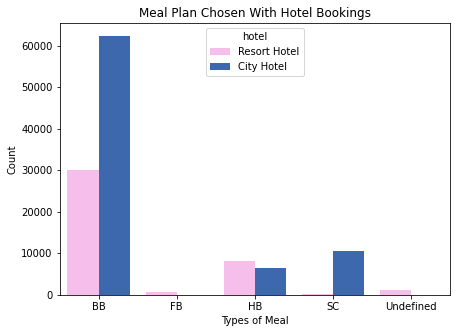

In [22]:
phuong_ly_palette = {'City Hotel': '#2c64bf', 'Resort Hotel': '#ffb5f0'}

plt.subplots(figsize=(7,5))
sns.countplot(x='meal', hue='hotel',  data=df, palette=phuong_ly_palette)
plt.xlabel('Types of Meal')
plt.ylabel('Count')
plt.title('Meal Plan Chosen With Hotel Bookings')

At both Resort Hotel and City Hotel: 
- BB is the most demanded meal 
- Fb is the least demanded meal 

### 9. How long do customers stay?

In [30]:
z = df.groupby(['hotel'])['stays_in_weekend_nights'].mean()
z

hotel
City Hotel      0.795185
Resort Hotel    1.189815
Name: stays_in_weekend_nights, dtype: float64

In [25]:
z[z==z.max()]

hotel
Resort Hotel    1.189815
Name: stays_in_weekend_nights, dtype: float64

In [28]:
y = df.groupby(['hotel'])['stays_in_week_nights'].mean()
y

hotel
City Hotel      2.182957
Resort Hotel    3.128732
Name: stays_in_week_nights, dtype: float64

In [29]:
y[y==y.max()]

hotel
Resort Hotel    3.128732
Name: stays_in_week_nights, dtype: float64

The average stay in weekend night:
- City Hotel: 1.18 
- Resort Hotel: 0.79 


The average stay in week night:
- City Hotel: 2.18
- Resort Hotel: 3.12

### 10. Repeated guests

In [31]:
city_hotel_df = df[(df['hotel'] == 'City Hotel') & (df['is_repeated_guest'] == 1)].copy()
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
city_hotel_df["arrival_date_month"] = pd.Categorical(city_hotel_df["arrival_date_month"], categories=ordered_months, ordered=True)

# pd.crosstab(
#         city_hotel_df['arrival_date_month'],
#         city_hotel_df['customer_type'])\
city_hotel_df['customer_type'].value_counts()

Transient          1618
Transient-Party     352
Group                48
Contract             14
Name: customer_type, dtype: int64

In [32]:
city_hotel_df['arrival_date_month'].value_counts()

October      230
July         216
May          203
March        183
January      178
December     166
November     164
June         155
September    149
February     146
August       137
April        105
Name: arrival_date_month, dtype: int64

In [34]:
pd.crosstab(
        city_hotel_df['arrival_date_month'],
        city_hotel_df['customer_type'])

customer_type,Contract,Group,Transient,Transient-Party
arrival_date_month,,,,
January,0,4,157,17
February,0,6,130,10
March,0,5,162,16
April,0,4,78,23
May,0,4,175,24
June,0,5,145,5
July,1,2,111,102
August,2,2,69,64
September,1,1,125,22


<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

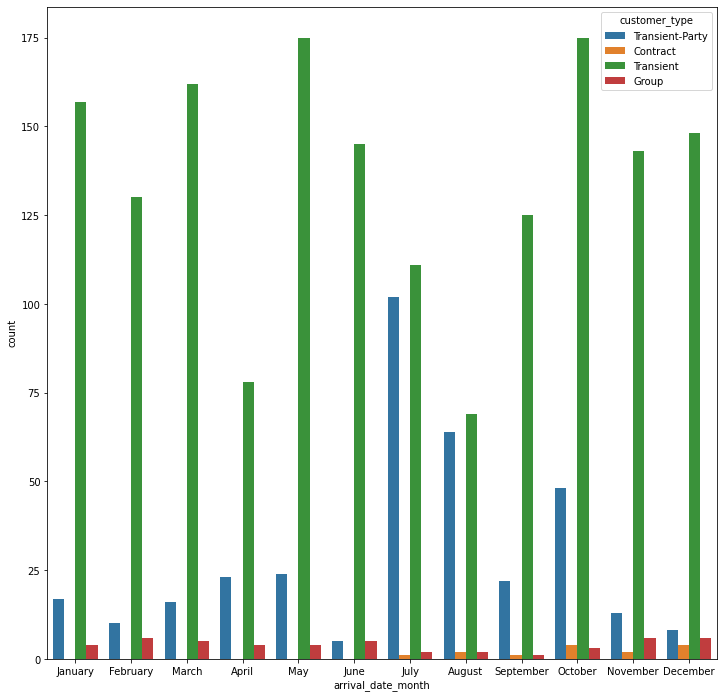

In [35]:
plt.subplots(figsize=(12,12))
sns.countplot(x='arrival_date_month', hue='customer_type',  data=city_hotel_df)

- The most popular repeated guests belong to Transient customer type through months.
- Then Transient-Party, and Group
- Contract customer type is  the least popular repeated guest. 